In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Preprocessing**

In [ ]:
import os
import numpy as np
from PIL import Image

# Define input and output directories
input_dir = "/content/drive/MyDrive/Datasets/Object_Dataset/_test/car"
output_dir = "/content/drive/MyDrive/Datasets/afterPreprocessing"
# Define image size and color mode
img_size = (224, 224)
color_mode = 'L'

# Loop over all images in input directory
for img_file in os.listdir(input_dir):
    # Open image
    img_path = os.path.join(input_dir, img_file)
    img = Image.open(img_path)
    
    # Resize image
    img = img.resize(img_size)
    
    # Convert to grayscale
    img = img.convert(color_mode)
    
    # Normalize pixel values to range [0, 1]
    img_arr = np.asarray(img) / 255.0
    
    # Flatten image to a 1D array
    img_arr = img_arr.flatten()
    
    # Save preprocessed image
    out_path = os.path.join(output_dir, img_file)
    np.savetxt(out_path, img_arr, delimiter=',')


Categorical Image classification using cnn (grayscale mode)

In [ ]:
import tensorflow as tf
import keras as keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

data_dir = ('/content/drive/MyDrive/Datasets/Object_Dataset/_train')
categories = ['car','cat','dog','flower','motorbike']
test_dir = "/content/drive/MyDrive/Datasets/Object_Dataset/_test"
valid_dir = "/content/drive/MyDrive/Datasets/Object_Dataset/_validation"
train_dir = "/content/drive/MyDrive/Datasets/Object_Dataset/_train"

"""
# Create an ImageDataGenerator object with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20, # Randomly rotate images by 20 degrees
    width_shift_range=0.2, # Randomly shift images horizontally by 20%
    height_shift_range=0.2, # Randomly shift images vertically by 20%
    shear_range=0.2, # Randomly apply shearing transformation with intensity of 20%
    zoom_range=0.2, # Randomly zoom images by 20%
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest' # Fill empty pixels with nearest neighbor
)
"""

generator_train = ImageDataGenerator(rescale=1./255,
                                     featurewise_center=False,
                                     samplewise_center=False,
                                     featurewise_std_normalization=False,
                                     samplewise_std_normalization=False,
                                     zca_whitening=False,
                                     rotation_range=0,
                                     zoom_range =0,width_shift_range=0,
                                     height_shift_range= 0,
                                     horizontal_flip = True,
                                     vertical_flip = False
                                     )
generator_test = ImageDataGenerator(rescale=1./255,
                                     featurewise_center=False,
                                     samplewise_center=False,
                                     featurewise_std_normalization=False,
                                     samplewise_std_normalization=False,
                                     zca_whitening=False,
                                     rotation_range=0,
                                     zoom_range =0,width_shift_range=0,
                                     height_shift_range= 0,
                                     horizontal_flip = True,
                                     vertical_flip = False
                                     )
generator_valid = ImageDataGenerator(rescale=1./255,
                                     featurewise_center=False,
                                     samplewise_center=False,
                                     featurewise_std_normalization=False,
                                     samplewise_std_normalization=False,
                                     zca_whitening=False,
                                     rotation_range=0,
                                     zoom_range =0,width_shift_range=0,
                                     height_shift_range= 0,
                                     horizontal_flip = True,
                                     vertical_flip = False
                                     )

"""
train_ds = generator_train.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="grayscale")
test_ds = generator_train.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="grayscale")

# Create the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(train_ds, epochs=5, validation_data=test_ds)
history.history.keys()
"""

'\ntrain_ds = generator_train.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="grayscale")\ntest_ds = generator_train.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="grayscale")\n\n# Create the model\nmodel = Sequential()\nmodel.add(Conv2D(32, (3,3), activation=\'relu\', input_shape=(64, 64, 1)))\nmodel.add(MaxPooling2D((2,2)))\nmodel.add(Conv2D(64, (3,3), activation=\'relu\'))\nmodel.add(MaxPooling2D((2,2)))\nmodel.add(Flatten())\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dense(len(categories), activation=\'softmax\'))\n\n# Compile the model\nmodel.compile(optimizer=\'adam\',\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\n# Train the model\nhistory=model.fit(train_ds, epochs=5, validation_data=test_ds)\nhistory.history.keys()\n'

In [ ]:
"""
from keras.preprocessing import image
import numpy as np

------------------------------------
img_path = '/content/drive/MyDrive/Datasets/Object_Dataset/_test/car/car_0088.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
pred_class = np.argmax(preds, axis=1)
if categories[pred_class[0]] in categories:
    print("The image belongs to the category: ", categories[pred_class[0]])
else:
    print("The image does not belong to the 8 categories.")
-----------------------------------

from PIL import Image
img = Image.open('/content/drive/MyDrive/Datasets/Object_Dataset/_test/car/car_0088.jpg')
img = img.resize((224,224))
img_array = np.array(img)
img_array = img_array / 255.
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_class = categories[np.argmax(predictions[0])]
print("The image is predicted to be a:", predicted_class)
"""

'\nfrom keras.preprocessing import image\nimport numpy as np\n\n------------------------------------\nimg_path = \'/content/drive/MyDrive/Datasets/Object_Dataset/_test/car/car_0088.jpg\'\nimg = image.load_img(img_path, target_size=(224,224))\nx = image.img_to_array(img)\nx = np.expand_dims(x, axis=0)\nx = preprocess_input(x)\n\npreds = model.predict(x)\npred_class = np.argmax(preds, axis=1)\nif categories[pred_class[0]] in categories:\n    print("The image belongs to the category: ", categories[pred_class[0]])\nelse:\n    print("The image does not belong to the 8 categories.")\n-----------------------------------\n\nfrom PIL import Image\nimg = Image.open(\'/content/drive/MyDrive/Datasets/Object_Dataset/_test/car/car_0088.jpg\')\nimg = img.resize((224,224))\nimg_array = np.array(img)\nimg_array = img_array / 255.\nimg_array = np.expand_dims(img_array, axis=0)\npredictions = model.predict(img_array)\npredicted_class = categories[np.argmax(predictions[0])]\nprint("The image is predicted 

In [ ]:
"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0,0].plot(history.history['accuracy'])
ax[0,0].set_title('model_accuracy')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train'],loc='upper left')

ax[0,1].plot(history.history['loss'])
ax[0,1].set_title('model_loss')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train'],loc='upper left')

ax[1,0].plot(history.history['val_accuracy'])
ax[1,0].set_title('model_val_categorical_accuracy')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train'],loc='upper left')

ax[1,1].plot(history.history['val_loss'])
ax[1,1].set_title('model_val_loss')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train'],loc='upper left')

plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nfig, ax = plt.subplots(2, 2, figsize=(15,10))\nax[0,0].plot(history.history['accuracy'])\nax[0,0].set_title('model_accuracy')\nax[0,0].set_ylabel('accuracy')\nax[0,0].set_xlabel('epoch')\nax[0,0].legend(['train'],loc='upper left')\n\nax[0,1].plot(history.history['loss'])\nax[0,1].set_title('model_loss')\nax[0,1].set_ylabel('loss')\nax[0,1].set_xlabel('epoch')\nax[0,1].legend(['train'],loc='upper left')\n\nax[1,0].plot(history.history['val_accuracy'])\nax[1,0].set_title('model_val_categorical_accuracy')\nax[1,0].set_ylabel('accuracy')\nax[1,0].set_xlabel('epoch')\nax[1,0].legend(['train'],loc='upper left')\n\nax[1,1].plot(history.history['val_loss'])\nax[1,1].set_title('model_val_loss')\nax[1,1].set_ylabel('loss')\nax[1,1].set_xlabel('epoch')\nax[1,1].legend(['train'],loc='upper left')\n\nplt.show()\n"

# **Categorical Image classification using cnn (RGB mode)**

In [ ]:

train_ds = generator_train.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="rgb")
test_ds = generator_train.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="rgb")

# Create the model
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(len(categories), activation='softmax'))

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history2=model2.fit(train_ds, epochs=50, validation_data=test_ds)


print(history2)


Found 933 images belonging to 5 classes.
Found 280 images belonging to 5 classes.
Epoch 1/50
30/30 [==============================] - 626s 21s/step - loss: 1.1930 - accuracy: 0.5113 - val_loss: 0.9360 - val_accuracy: 0.6286
Epoch 2/50
30/30 [==============================] - 5s 153ms/step - loss: 0.6630 - accuracy: 0.7106 - val_loss: 0.6369 - val_accuracy: 0.7679
Epoch 3/50
30/30 [==============================] - 4s 125ms/step - loss: 0.4869 - accuracy: 0.7835 - val_loss: 0.5717 - val_accuracy: 0.7607
Epoch 4/50
30/30 [==============================] - 4s 125ms/step - loss: 0.4966 - accuracy: 0.7942 - val_loss: 0.7002 - val_accuracy: 0.6929
Epoch 5/50
30/30 [==============================] - 4s 142ms/step - loss: 0.3855 - accuracy: 0.8349 - val_loss: 0.5028 - val_accuracy: 0.7964
Epoch 6/50
30/30 [==============================] - 5s 157ms/step - loss: 0.3088 - accuracy: 0.8628 - val_loss: 0.5474 - val_accuracy: 0.7536
Epoch 7/50
30/30 [==============================] - 4s 127ms/step 

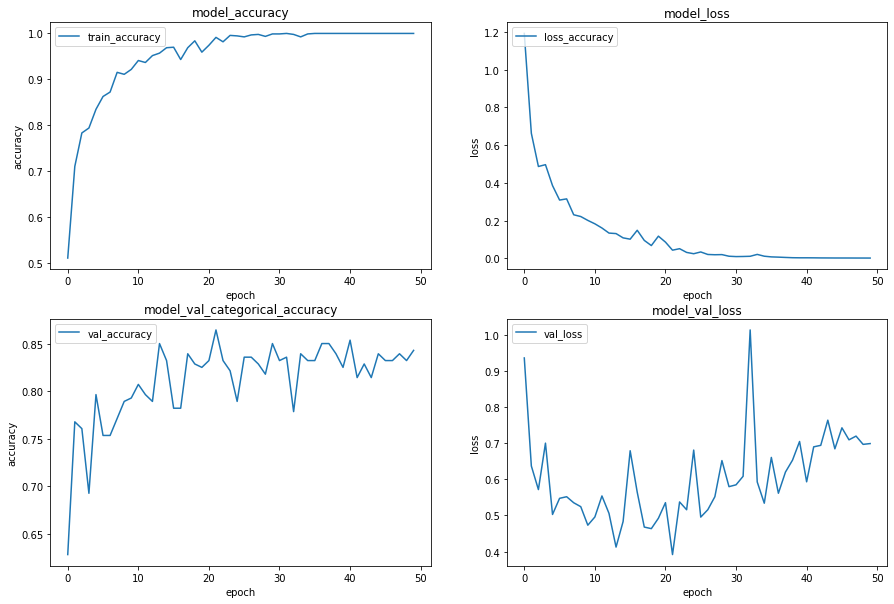

In [ ]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0,0].plot(history2.history['accuracy'])
ax[0,0].set_title('model_accuracy')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train_accuracy'],loc='upper left')

ax[0,1].plot(history2.history['loss'])
ax[0,1].set_title('model_loss')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['loss_accuracy'],loc='upper left')

ax[1,0].plot(history2.history['val_accuracy'])
ax[1,0].set_title('model_val_categorical_accuracy')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['val_accuracy'],loc='upper left')

ax[1,1].plot(history2.history['val_loss'])
ax[1,1].set_title('model_val_loss')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['val_loss'],loc='upper left')

plt.show()


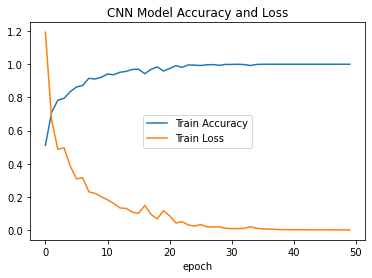

In [ ]:
import matplotlib.pyplot as plt
plt.title('CNN Model Accuracy and Loss')
# plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.legend(['Train Accuracy','Train Loss'],loc='center')
plt.show()

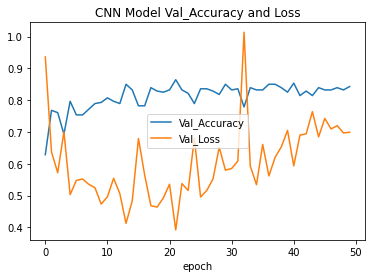

In [ ]:
import matplotlib.pyplot as plt
plt.title('CNN Model Val_Accuracy and Loss')
# plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['val_loss'])
plt.legend(['Val_Accuracy','Val_Loss'],loc='center')
plt.show()

In [ ]:


from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predictions for the test dataset
test_labels = test_ds.classes
predictions = np.argmax(model2.predict(test_ds), axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix for CNN Model")
print(cm)

predictions = model2.predict(test_ds)

# convert predictions to binary values
binary_predictions = np.argmax(predictions, axis=1)

# compute accuracy as the fraction of correct predictions
accuracy = np.mean(binary_predictions == test_labels)

# print the accuracy
print('Test accuracy:', accuracy)

# compute the specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Specificity:", specificity)
precision = cm[1,1] / (cm[1,1] + cm[0,1])
print("Precision:", precision)
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Sensitivity:", sensitivity)

9/9 [==============================] - 1s 97ms/step
Confusion Matrix for CNN Model
[[ 6 13 12 16 10]
 [ 6 17  8 12 13]
 [16 19  7 10  5]
 [12  8 16 10 10]
 [11 11 12  8 12]]
9/9 [==============================] - 1s 96ms/step
Test accuracy: 0.18928571428571428
Specificity: 0.3157894736842105
Precision: 0.5666666666666667
Sensitivity: 0.7391304347826086


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_true = test_ds.classes
y_pred = model2.predict(test_ds)

# get the class predictions from the probabilities
y_pred_classes = y_pred.argmax(axis=-1)

# calculate the F1 score
f1score = f1_score(y_true, y_pred_classes, average='weighted')

print("F1 score for CNN Model")
print('F1 Score:', f1score)

print()
print()
print(classification_report(y_true,y_pred_classes))

9/9 [==============================] - 1s 100ms/step
F1 score for CNN Model
F1 Score: 0.16851994145539123


              precision    recall  f1-score   support

           0       0.20      0.18      0.19        57
           1       0.13      0.16      0.15        56
           2       0.19      0.18      0.18        57
           3       0.20      0.20      0.20        56
           4       0.13      0.13      0.13        54

    accuracy                           0.17       280
   macro avg       0.17      0.17      0.17       280
weighted avg       0.17      0.17      0.17       280



# **Densenet**

In [ ]:
train_ds = generator_train.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="rgb")
test_ds = generator_train.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="rgb")
valid_ds = generator_valid.flow_from_directory(valid_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode="rgb")

import tensorflow as tf
import keras as keras
import keras
from keras.applications.densenet import DenseNet121

# create the model
densenetModel = DenseNet121(include_top=True,weights=None,input_shape=(64,64,3),classes=5)

# Compile the model
densenetModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
densehistory=densenetModel.fit(train_ds, epochs=50, validation_data=test_ds)

Found 933 images belonging to 5 classes.
Found 280 images belonging to 5 classes.
Found 273 images belonging to 5 classes.
Epoch 1/50
30/30 [==============================] - 74s 362ms/step - loss: 1.0660 - accuracy: 0.6002 - val_loss: 1.6790 - val_accuracy: 0.2000
Epoch 2/50
30/30 [==============================] - 6s 189ms/step - loss: 0.7401 - accuracy: 0.7010 - val_loss: 3.0152 - val_accuracy: 0.2000
Epoch 3/50
30/30 [==============================] - 5s 161ms/step - loss: 0.5440 - accuracy: 0.7771 - val_loss: 2.4660 - val_accuracy: 0.2000
Epoch 4/50
30/30 [==============================] - 8s 258ms/step - loss: 0.4991 - accuracy: 0.8039 - val_loss: 2.5196 - val_accuracy: 0.2036
Epoch 5/50
30/30 [==============================] - 5s 161ms/step - loss: 0.5285 - accuracy: 0.7910 - val_loss: 4.7032 - val_accuracy: 0.2000
Epoch 6/50
30/30 [==============================] - 7s 219ms/step - loss: 0.5449 - accuracy: 0.7953 - val_loss: 5.3175 - val_accuracy: 0.2000
Epoch 7/50
30/30 [======

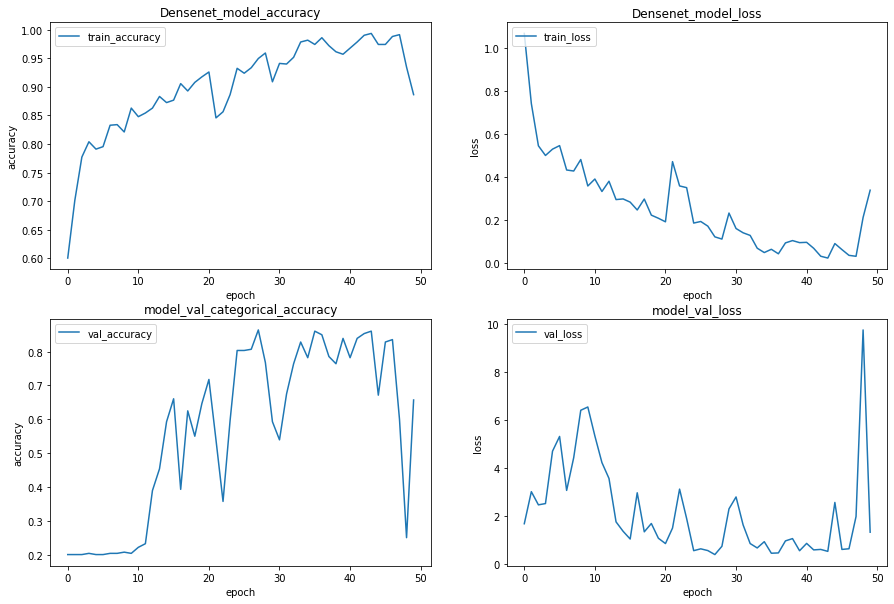

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0,0].plot(densehistory.history['accuracy'])
ax[0,0].set_title('Densenet_model_accuracy')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train_accuracy'],loc='upper left')

ax[0,1].plot(densehistory.history['loss'])
ax[0,1].set_title('Densenet_model_loss')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train_loss'],loc='upper left')

ax[1,0].plot(densehistory.history['val_accuracy'])
ax[1,0].set_title('model_val_categorical_accuracy')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['val_accuracy'],loc='upper left')

ax[1,1].plot(densehistory.history['val_loss'])
ax[1,1].set_title('model_val_loss')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['val_loss'],loc='upper left')

plt.show()


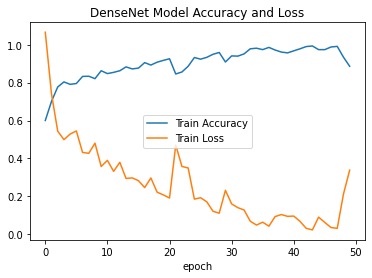

In [ ]:
import matplotlib.pyplot as plt
plt.title('DenseNet Model Accuracy and Loss')
# plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(densehistory.history['accuracy'])
plt.plot(densehistory.history['loss'])
plt.legend(['Train Accuracy','Train Loss'],loc='center')
plt.show()

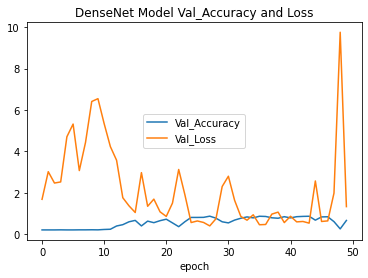

In [ ]:
import matplotlib.pyplot as plt
plt.title('DenseNet Model Val_Accuracy and Loss')
# plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(densehistory.history['val_accuracy'])
plt.plot(densehistory.history['val_loss'])
plt.legend(['Val_Accuracy','Val_Loss'],loc='center')
plt.show()

In [ ]:

"""
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predictions for the test dataset
test_labels = test_ds.classes
predictions = np.argmax(densenetModel.predict(test_ds), axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Print the confusion matrix
print("Confusion Matrix for Densenet Model")
print(cm)
"""

from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predictions for the test dataset
test_labels = test_ds.classes
predictions = np.argmax(densenetModel.predict(test_ds), axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix for CNN Model")
print(cm)

predictions = densenetModel.predict(test_ds)

# convert predictions to binary values
binary_predictions = np.argmax(predictions, axis=1)

# compute accuracy as the fraction of correct predictions
accuracy = np.mean(binary_predictions == test_labels)

# print the accuracy
print('Test accuracy:', accuracy)

# compute the specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Specificity:", specificity)
precision = cm[1,1] / (cm[1,1] + cm[0,1])
print("Precision:", precision)
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Sensitivity:", sensitivity)

9/9 [==============================] - 3s 142ms/step
Confusion Matrix for CNN Model
[[13  4 16 12 12]
 [11  8 21  8  8]
 [14  4 19 11  9]
 [14  7 21  6  8]
 [12  7 20  7  8]]
9/9 [==============================] - 1s 143ms/step
Test accuracy: 0.18928571428571428
Specificity: 0.7647058823529411
Precision: 0.6666666666666666
Sensitivity: 0.42105263157894735


In [ ]:
from sklearn.metrics import f1_score

y_true = test_ds.classes
y_pred = densenetModel.predict(test_ds)

# get the class predictions from the probabilities
y_pred_classes = y_pred.argmax(axis=-1)

# calculate the F1 score
f1score = f1_score(y_true, y_pred_classes, average='weighted')

print("F1 score for Densenet Model")
print('F1 Score:', f1score)

print()
print()
print(classification_report(y_true,y_pred_classes))

9/9 [==============================] - 1s 108ms/step
F1 score for Densenet Model
F1 Score: 0.1818178898325526


              precision    recall  f1-score   support

           0       0.20      0.23      0.21        57
           1       0.25      0.12      0.17        56
           2       0.16      0.28      0.21        57
           3       0.16      0.12      0.14        56
           4       0.20      0.17      0.18        54

    accuracy                           0.19       280
   macro avg       0.19      0.19      0.18       280
weighted avg       0.19      0.19      0.18       280



# **VGG19**

In [ ]:
from keras.applications import VGG19

# Load pre-trained VGG19 model
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers
for layer in vgg19.layers:
    layer.trainable = False

# Add a new classifier on top of the VGG19 model
vgg19model = Sequential()
vgg19model.add(vgg19)
vgg19model.add(Flatten())
vgg19model.add(Dense(1024, activation='relu'))
vgg19model.add(Dense(512, activation='relu'))
vgg19model.add(Dense(len(categories), activation='softmax'))

# Compile the model
vgg19model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg19history = vgg19model.fit(train_ds, epochs=50, validation_data=test_ds)

80134624/80134624 [==============================] - 5s 0us/step
Epoch 1/50
30/30 [==============================] - 8s 192ms/step - loss: 0.8212 - accuracy: 0.6913 - val_loss: 0.4501 - val_accuracy: 0.8107
Epoch 2/50
30/30 [==============================] - 4s 143ms/step - loss: 0.3200 - accuracy: 0.8692 - val_loss: 0.3470 - val_accuracy: 0.8571
Epoch 3/50
30/30 [==============================] - 4s 147ms/step - loss: 0.2413 - accuracy: 0.9057 - val_loss: 0.4017 - val_accuracy: 0.8321
Epoch 4/50
30/30 [==============================] - 4s 140ms/step - loss: 0.1624 - accuracy: 0.9421 - val_loss: 0.3884 - val_accuracy: 0.8536
Epoch 5/50
30/30 [==============================] - 4s 133ms/step - loss: 0.1460 - accuracy: 0.9346 - val_loss: 0.4228 - val_accuracy: 0.8429
Epoch 6/50
30/30 [==============================] - 4s 142ms/step - loss: 0.1446 - accuracy: 0.9389 - val_loss: 0.3072 - val_accuracy: 0.8786
Epoch 7/50
30/30 [==============================] - 4s 147ms/step - loss: 0.1022 - 

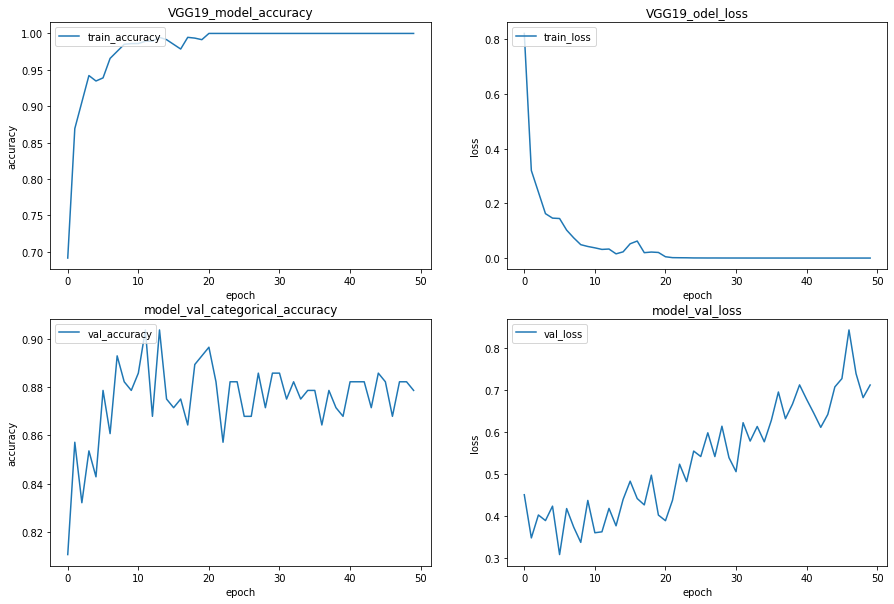

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0,0].plot(vgg19history.history['accuracy'])
ax[0,0].set_title('VGG19_model_accuracy')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train_accuracy'],loc='upper left')

ax[0,1].plot(vgg19history.history['loss'])
ax[0,1].set_title('VGG19_odel_loss')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train_loss'],loc='upper left')

ax[1,0].plot(vgg19history.history['val_accuracy'])
ax[1,0].set_title('model_val_categorical_accuracy')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['val_accuracy'],loc='upper left')

ax[1,1].plot(vgg19history.history['val_loss'])
ax[1,1].set_title('model_val_loss')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['val_loss'],loc='upper left')

plt.show()


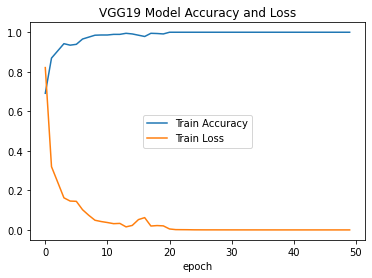

In [ ]:
import matplotlib.pyplot as plt
plt.title('VGG19 Model Accuracy and Loss')
# plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(vgg19history.history['accuracy'])
plt.plot(vgg19history.history['loss'])
plt.legend(['Train Accuracy','Train Loss'],loc='center')
plt.show()

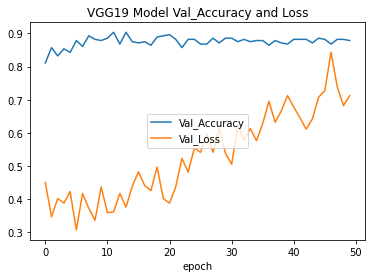

In [ ]:
import matplotlib.pyplot as plt
plt.title('VGG19 Model Val_Accuracy and Loss')
# plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(vgg19history.history['val_accuracy'])
plt.plot(vgg19history.history['val_loss'])
plt.legend(['Val_Accuracy','Val_Loss'],loc='center')
plt.show()

In [ ]:

"""
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predictions for the test dataset
test_labels = test_ds.classes
predictions = np.argmax(vgg19model.predict(test_ds), axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Print the confusion matrix

print("Confusion Matrix for VGG19 Model")
print(cm)
"""


from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predictions for the test dataset
test_labels = test_ds.classes
predictions = np.argmax(vgg19model.predict(test_ds), axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix for CNN Model")
print(cm)

predictions = vgg19model.predict(test_ds)

# convert predictions to binary values
binary_predictions = np.argmax(predictions, axis=1)

# compute accuracy as the fraction of correct predictions
accuracy = np.mean(binary_predictions == test_labels)

# print the accuracy
print('Test accuracy:', accuracy)

# compute the specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Specificity:", specificity)
precision = cm[1,1] / (cm[1,1] + cm[0,1])
print("Precision:", precision)
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Sensitivity:", sensitivity)

9/9 [==============================] - 1s 131ms/step
Confusion Matrix for CNN Model
[[14 18  8 11  6]
 [10 12  9 11 14]
 [ 7 16 12  9 13]
 [14 12  7 13 10]
 [11 17  5 12  9]]
9/9 [==============================] - 1s 136ms/step
Test accuracy: 0.22142857142857142
Specificity: 0.4375
Precision: 0.4
Sensitivity: 0.5454545454545454


In [ ]:
from sklearn.metrics import f1_score

y_true = test_ds.classes
y_pred = vgg19model.predict(test_ds)

# get the class predictions from the probabilities
y_pred_classes = y_pred.argmax(axis=-1)

# calculate the F1 score

f1score = f1_score(y_true, y_pred_classes, average='weighted')

print('F1 Score for VGG19 Model')
print('F1 Score:', f1score)

print()
print()
print(classification_report(y_true,y_pred_classes))

9/9 [==============================] - 1s 98ms/step
F1 Score for VGG19 Model
F1 Score: 0.18868134670021464


              precision    recall  f1-score   support

           0       0.16      0.16      0.16        57
           1       0.20      0.27      0.23        56
           2       0.26      0.19      0.22        57
           3       0.18      0.18      0.18        56
           4       0.15      0.15      0.15        54

    accuracy                           0.19       280
   macro avg       0.19      0.19      0.19       280
weighted avg       0.19      0.19      0.19       280



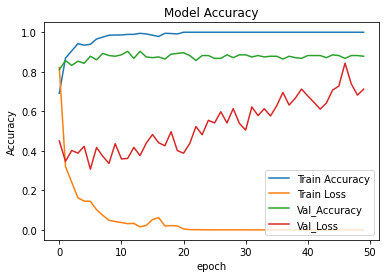

In [ ]:

import matplotlib.pyplot as plt
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(vgg19history.history['accuracy'])
plt.plot(vgg19history.history['loss'])
plt.plot(vgg19history.history['val_accuracy'])
plt.plot(vgg19history.history['val_loss'])
plt.legend(['Train Accuracy','Train Loss','Val_Accuracy','Val_Loss'],loc='lower right')
plt.show()

9/9 [==============================] - 1s 97ms/step


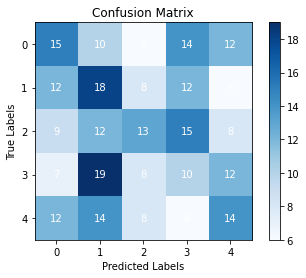

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = vgg19model.predict(test_ds)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_ds.classes

# cm=confusion_matrix(train_ds.classes,y_pred)
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(cm.shape[0]))
plt.yticks(np.arange(cm.shape[1]))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np



vcm = confusion_matrix(test_ds.classes, np.argmax(vgg19model.predict(test_ds), axis=1))
print(vcm)
vaccuracy = np.sum(np.diag(vcm)) / np.sum(vcm)
vprecision = np.zeros(5)
for i in range(5):
    vprecision[i] = vcm[i,i] / np.sum(vcm[:,i])
vsensitivity = np.zeros(5)
for i in range(5):
    vsensitivity[i] = vcm[i,i] / np.sum(vcm[i,:])
vspecificity = np.zeros(5)
for i in range(5):
    tn = np.sum(vcm[:i,:i]) + np.sum(vcm[:i,i+1:]) + np.sum(vcm[i+1:,:i]) + np.sum(vcm[i+1:,i+1:])
    fp = np.sum(vcm[:,i]) - vcm[i,i]
    vspecificity[i] = tn / (tn + fp)

# print the evaluation metrics
print('Accuracy:', np.sum(vaccuracy)/5)
print('Precision:', np.sum(vprecision)/5)
print('Sensitivity (Recall):', np.sum(vsensitivity)/5)
print('Specificity:', np.sum(vspecificity)/5)


9/9 [==============================] - 1s 101ms/step
[[15 15  5 13  9]
 [17 18  6  8  7]
 [ 5 19 13 12  8]
 [12  9  8 12 15]
 [ 7 12 11 11 13]]
Accuracy: 0.05071428571428571
Precision: 0.25620875620079187
Sensitivity (Recall): 0.25353661932609295
Specificity: 0.8134167384760167


In [ ]:
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs
)

NameError: ignored

In [ ]:

from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

#cnn
cnncm = confusion_matrix(test_ds.classes, np.argmax(model2.predict(test_ds), axis=-1))
cnnaccuracy = np.mean(np.argmax(model2.predict(test_ds), axis=1) == test_ds.classes)
cnnspecificity = cnncm[0,0] / (cnncm[0,0] + cnncm[0,1])
cnnprecision = cnncm[1,1] / (cnncm[1,1] + cnncm[0,1])
cnnsensitivity = cnncm[1,1] / (cnncm[1,0] + cnncm[1,1])

#densenet
dcm = confusion_matrix(test_ds.classes, np.argmax(densenetModel.predict(test_ds), axis=-1))
daccuracy = np.mean(np.argmax(densenetModel.predict(test_ds), axis=1) == test_ds.classes)
dspecificity = dcm[0,0] / (dcm[0,0] + dcm[0,1])
dprecision = dcm[1,1] / (dcm[1,1] + dcm[0,1])
dsensitivity = dcm[1,1] / (dcm[1,0] + dcm[1,1])

#vgg
vcm = confusion_matrix(test_ds.classes, np.argmax(vgg19model.predict(test_ds), axis=-1))
vaccuracy = np.mean(np.argmax(vgg19model.predict(test_ds), axis=1) == test_ds.classes)
vspecificity = vcm[0,0] / (vcm[0,0] + vcm[0,1])
vprecision = vcm[1,1] / (vcm[1,1] + vcm[0,1])
vsensitivity = vcm[1,1] / (vcm[1,0] + vcm[1,1])

#Comparison table
data = {'Model': ['CNN', 'DenseNet', 'VGG19'],
        'Accuracy': [cnnaccuracy, daccuracy, vaccuracy],
        'Specificity':[cnnspecificity,dspecificity,vspecificity],
        'Precision': [cnnprecision, dprecision, vprecision],
        'Sensitivity': [cnnsensitivity, dsensitivity, vsensitivity]}
df = pd.DataFrame(data)

# print the DataFrame
print(df)

9/9 [==============================] - 1s 116ms/step
      Model  Accuracy  Specificity  Precision  Sensitivity
0       CNN  0.196429     0.520000   0.520000     0.541667
1  DenseNet  0.185714     0.777778   0.333333     0.181818
2     VGG19  0.232143     0.541667   0.592593     0.592593


**Prediction**

In [ ]:
# import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np

# define the image path for prediction
img_path = "/content/drive/MyDrive/Datasets/Object_Dataset/_test/car/car_0097.jpg"
label=categories+["Unknown"]
# load the image and preprocess it
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.resnet50.preprocess_input(x)

# make a prediction
prediction = vgg19model.predict(x)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_label = label[predicted_class_index]

if predicted_label=="Unknown":print("Unknown Image")
else:print(predicted_label)



1/1 [==============================] - 0s 23ms/step
car


Transfer learning model of 


dataset-test,train,validation
model-densenet,vgg
Result: Training, Accuracy,loss
        Test /validation, accuracy, fi-score
confusion matrix